##The Beta-Binomial Model in Python 

The following is a demonstration of a Bayesian approach to inferring binomial parameters in Python. The presentation is heavily influenced by Kruschke's treatment of the same material in his *Doing Bayesian Data Analysis*, though adapted for Python. 

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as scs

## The beta distribution

A conjugate prior describes any situation in which the product of a prior probability on a parameter multiplied by the likelihood of the data given the parameter yields a function of the same form as the prior. In other words, where the product of $p(\theta)$ and $p(y|\theta)$ is of the same form as $p(\theta)$. 

In the case of the Bernoulli likelihood function, which is 

$$\theta^y (1-\theta)^{1-y},$$

the likelihood of $z$ successes in $N$ trials is given by

$$p(z, N|\theta) = \theta^z (1 - \theta)^{N-z}.$$

In this case, the conjugate prior is the beta distribution, $\text{beta}(\theta|a,b)$, which is 

$$\frac{\theta^{a-1}(1-\theta)^{b-1}}{B(a,b)}.$$

The resulting posterior is then given by 

$$\frac{\theta^{(z+a-1)}(1-\theta)^{(N-z+b-1)}}{B(z+a, N-z+b)}.$$

A couple important points about this update. The weight given to the prior in its contribution to the posterior decreases as $N$ increases, which increases the values $z$ and $N-z$ in the likelihood function. In other words, the more data we have, the less influential is the prior and the more influential is the evidence we obtain from the likelihood, all else equal. On the other hand, as $a+b$ increases, the greater the contribution of the prior to the posterior, all else equal. When $N = a + b$, the likelihood and the prior contribute equally the posterior distribution of $\theta$. 

This is key, because it tells us about how to specify the prior. Particularly, it prompts us to think about how much data would be necessary to move us away from prior beliefs about $\theta$. 

###The beta distribution

All that said, let's look at values of $a$ and $b$ in the beta distribution. First, the beta distribution gives us a belief about the distribution of $\theta$ over the interval $\left[0,1\right]$, which is what we need for a binary classification problem. 

The first thing to note is that the mean of the distribution is given by 

$$\bar{\theta} = \frac{a}{a + b}$$

which tells us, for example, that the mean is 0.5 when $a = b$. As $a$ grows relative to $b$, the probability that $y = 1$ increases, and vice versa. The second thing to note is that $a$ and $b$ grow in magnitude, the beta distribution gets narrower around the mean. 

Let's see the beta distribution for various values of $a$ and $b$. 

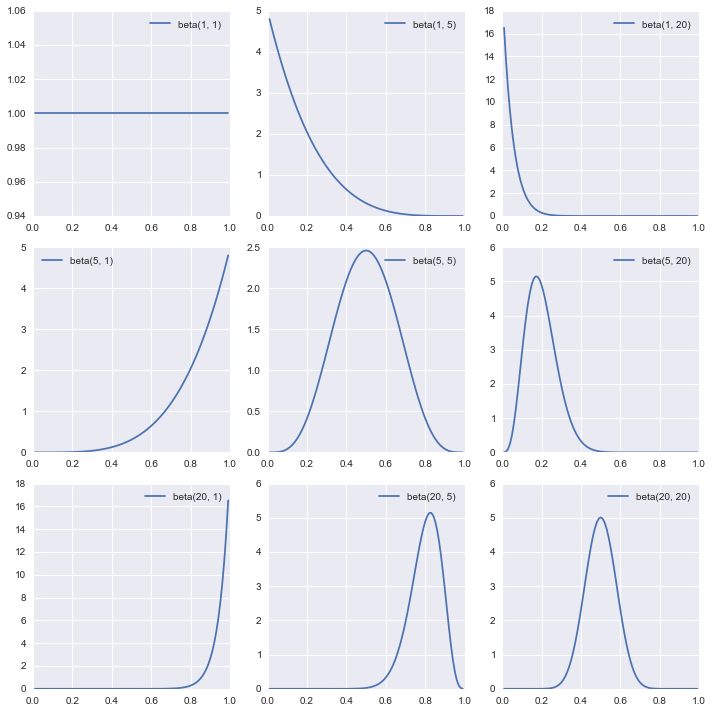

In [2]:
params = [(1, 1), (1, 5), (1, 20),
          (5, 1), (5, 5), (5, 20),
          (20, 1), (20, 5), (20, 20)]
x = np.linspace(0.01, 0.99, 99)

plt.figure(figsize=(10, 10))
for idx, p in zip(np.arange(1, 10), params):
    plt.subplot(3, 3, idx)
    plt.plot(x, scs.beta(p[0], p[1]).pdf(x), label='beta({0}, {1})'.format(p[0], p[1]))
    plt.legend(loc='best')
plt.tight_layout()

These plots demonstrate the relation between $a$ and $b$ and also indicate that the prior is more influential as $a+b$ grows, i.e., we are more certain about the prior and more evidence (data) will be required for the likelihood to change our beliefs about $\theta$. To see this explicitly, note that the standard deviation of the beta distribution is 

$$\sqrt{ \frac{\bar{\theta} (1-\bar{\theta}) }{ (a + b + 1)} }$$

which suggests that the standard deviation gets smaller as $a$ and $b$ grow, all else equal.

Now let's see what happens when we have some observed data, say the number of heads observed when we flip a coin 5 times and 30 times, and let's say each of those trials yields a head 4 out of 5 times. 

The first thing we need to do is evaluate the hyperparameters of the posterior distribution. 

In [3]:
params5 = [(p[0] + 4, p[1] + 5 - 4) for p in params]
params30 = [(p[0] + 24, p[1] + 30 - 24) for p in params]

Now we can plot the update for these priors given the data. 

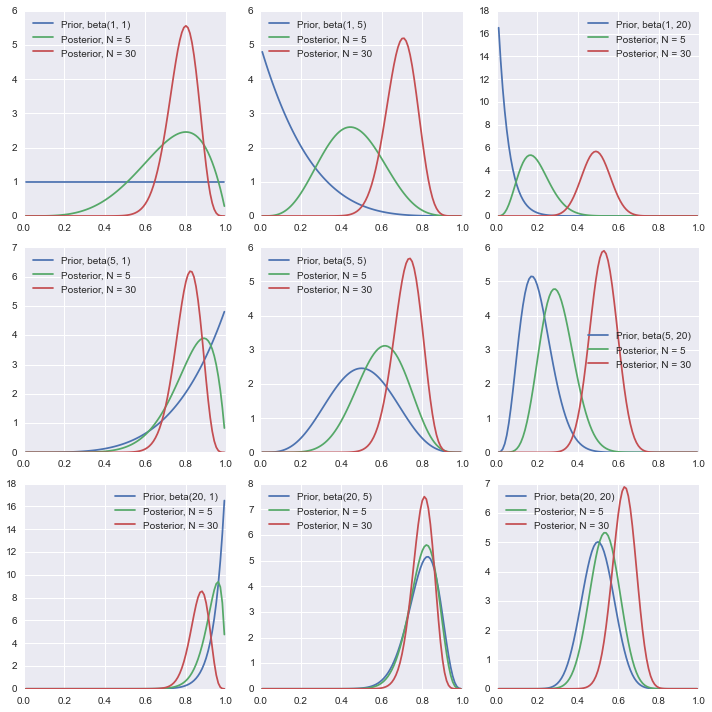

In [4]:
plt.figure(figsize=(10, 10))
for idx, p, p5, p30 in zip(np.arange(1, 10), params, params5, params30):
    plt.subplot(3, 3, idx)
    plt.plot(x, scs.beta(p[0], p[1]).pdf(x), label='Prior, beta({0}, {1})'.format(p[0], p[1]))
    plt.plot(x, scs.beta(p5[0], p5[1]).pdf(x), label='Posterior, N = 5')
    plt.plot(x, scs.beta(p30[0], p30[1]).pdf(x), label='Posterior, N = 30')
    plt.legend(loc='best') 
plt.tight_layout()

In the end, we should note that for those cases where our prior suggests that $\theta$ is 0.5, e.g., a *fair coin*, it takes more evidence to change our belief as $a+b$ grows. In the extreme, in the case where $a=b=1$, the likelihood contributes very heavily to our posterior belief and it does not take much evidence to change our prior belief. By contrast, in the case where $a=b=20$, it takes more evidence before our belief changes. 